# Выпусконой Проект

# Призентация:
    https://docs.google.com/presentation/d/1vB6bT4pCGObVnjHi6MDV33ox67p7mEw9efZJuCvG_fs/edit#slide=id.gf5ef3fab52_0_39

# **Описание данных:**

Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

Колонки:

- `userid` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `City` — город,
- `Gender` — пол,
- `Age` — возраст,
- `Objects` — количество объектов в собственности,
- `Balance` — баланс на счёте,
- `Products` — количество продуктов, которыми пользуется клиент,
- `CreditCard` — есть ли кредитная карта,
- `Loyalty` — активный клиент,
- `estimated_salary` — заработная плата клиента,
- `Churn` — ушёл или нет.

По итогам исследования подготовьте презентацию. Для создания презентации используйте любой удобный инструмент, но отправить презентацию нужно
**обязательно** в формате **pdf**.

# 1. Открою таблицу, изучу данные
Путь к файлу: bank_dataset.csv

# 2. Исследую данные

# 3. Проведу исследовательский анализ данных.

# 4. Проверка гипотиз 

# 5. Сегментация пользователей по потреблению.

# 6. Выводы

#  1. Открою таблицу, изучу данные

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import math

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('bank_dataset.csv')
df

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15648965,771,Ярославль,М,39,5,NaN,2,1,0,96270.64,0
9996,15612628,516,Ярославль,М,35,10,57369.61,1,1,1,101699.77,0
9997,15627268,709,Ярославль,Ж,36,7,NaN,1,0,1,42085.58,1
9998,15725091,772,Ростов Великий,М,42,3,75075.31,2,1,0,92888.52,1


Balance имеются пропуски

# 2. Исследую данные

In [3]:
df.columns = df.columns.str.lower()
df

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15648965,771,Ярославль,М,39,5,NaN,2,1,0,96270.64,0
9996,15612628,516,Ярославль,М,35,10,57369.61,1,1,1,101699.77,0
9997,15627268,709,Ярославль,Ж,36,7,NaN,1,0,1,42085.58,1
9998,15725091,772,Ростов Великий,М,42,3,75075.31,2,1,0,92888.52,1


привела к нижнему ригистру

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
userid              10000 non-null int64
score               10000 non-null int64
city                10000 non-null object
gender              10000 non-null object
age                 10000 non-null int64
objects             10000 non-null int64
balance             6383 non-null float64
products            10000 non-null int64
creditcard          10000 non-null int64
loyalty             10000 non-null int64
estimated_salary    10000 non-null float64
churn               10000 non-null int64
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


Изменю тип estimated_salary на int


In [5]:
df['estimated_salary'] = df['estimated_salary'].astype('int')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
userid              10000 non-null int64
score               10000 non-null int64
city                10000 non-null object
gender              10000 non-null object
age                 10000 non-null int64
objects             10000 non-null int64
balance             6383 non-null float64
products            10000 non-null int64
creditcard          10000 non-null int64
loyalty             10000 non-null int64
estimated_salary    10000 non-null int64
churn               10000 non-null int64
dtypes: float64(1), int64(9), object(2)
memory usage: 937.6+ KB
None


In [6]:
df.head(5)

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084,0


In [7]:
display(df.describe()) 

for col in df.columns:
    
    if df[col].dtype == "object":
    
        print(col)
        print(df[col].unique())
        print()

,userid,score,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,6383.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.573368e+07,650.528800,38.921800,5.012800,119827.493793,1.530200,0.70550,0.515100,100089.748400,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,30095.056462,0.581654,0.45584,0.499797,57510.491042,0.402769
min,1.560844e+07,350.000000,18.000000,0.000000,3768.690000,1.000000,0.00000,0.000000,11.000000,0.000000
25%,1.567126e+07,584.000000,32.000000,3.000000,100181.975000,1.000000,0.00000,0.000000,51001.750000,0.000000
50%,1.573347e+07,652.000000,37.000000,5.000000,119839.690000,1.000000,1.00000,1.000000,100193.500000,0.000000
75%,1.579597e+07,718.000000,44.000000,7.000000,139512.290000,2.000000,1.00000,1.000000,149387.750000,0.000000
max,1.585843e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.000000,1.000000


city
['Ярославль' 'Рыбинск' 'Ростов Великий']

gender
['Ж' 'М']



In [8]:
df.duplicated().sum()

0

дубликатов нет 

In [9]:
df[df['balance'].isnull()].head(10)

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826,0
6,15635267,822,Ярославль,М,50,7,NaN,2,1,1,10062,0
11,15779909,497,Рыбинск,М,24,3,NaN,2,1,0,76390,0
12,15675000,476,Ярославль,Ж,34,10,NaN,2,1,0,26260,0
13,15734219,549,Ярославль,Ж,25,5,NaN,2,0,0,190857,0
14,15643618,635,Рыбинск,Ж,35,7,NaN,2,1,1,65951,0
17,15830954,549,Рыбинск,Ж,24,9,NaN,2,1,1,14406,0
18,15704243,587,Рыбинск,М,45,6,NaN,1,0,0,158684,0
19,15611718,726,Ярославль,Ж,24,6,NaN,2,1,1,54724,0


In [10]:
len(df[df['balance'].isna()])

3617

Отсутствуют 3600 значений баланса может нет денег или уже не пользуются картой. 
Заполню пропуски медианами. Для этого выделим медианный баланс пользователя по городу, полу и возрасту. 
Заполнение таким способом не ударит сильно по распределению баланса и средних.

In [11]:
# medians=(df.groupby(['city','gender','age'],as_index=False).agg({'balance':'median'})).rename(columns={'balance':'median_balance'})
# df=df.merge(medians, on=['city','gender','age'])
# df.loc[df['balance'].isna(), 'balance']=df.loc[df['balance'].isna(), 'median_balance']
# df=df.drop('median_balance', axis=1)

In [12]:
# print('Количество пропущенных значений после заполнения:',df['balance'].isna().sum())

Только для 28 пользователей не нашлось значений, просто уберем их.

In [13]:
# df=df.dropna()

In [14]:
df.fillna(-1, inplace=True)


Если я заменю пропуски на 0, то исказится картина всего, оставим их без изменения.


# Вывод
В балансе пропуски скорей всего нет денег на счете, а может картой не пользуются вовсе.
Дубликатов нет, пропусков осталось 28.
Привела название к нинему регистру.
Изменила тип estimated_salary на int 

# 3. Проведу исследовательский анализ данных.

In [15]:
df.head()

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,-1.00,1,1,1,101348,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931,1
3,15744090,699,Ярославль,Ж,39,1,-1.00,2,0,0,93826,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084,0


In [16]:
df['gender'].value_counts()

М    5457
Ж    4543
Name: gender, dtype: int64

In [17]:
df['city'].value_counts()

Ярославль         5014
Ростов Великий    2509
Рыбинск           2477
Name: city, dtype: int64

In [18]:
df.describe()

,userid,score,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.573368e+07,650.528800,38.921800,5.012800,76485.527588,1.530200,0.70550,0.515100,100089.748400,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.848614,0.581654,0.45584,0.499797,57510.491042,0.402769
min,1.560844e+07,350.000000,18.000000,0.000000,-1.000000,1.000000,0.00000,0.000000,11.000000,0.000000
25%,1.567126e+07,584.000000,32.000000,3.000000,-1.000000,1.000000,0.00000,0.000000,51001.750000,0.000000
50%,1.573347e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.500000,0.000000
75%,1.579597e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149387.750000,0.000000
max,1.585843e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.000000,1.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
userid              10000 non-null int64
score               10000 non-null int64
city                10000 non-null object
gender              10000 non-null object
age                 10000 non-null int64
objects             10000 non-null int64
balance             10000 non-null float64
products            10000 non-null int64
creditcard          10000 non-null int64
loyalty             10000 non-null int64
estimated_salary    10000 non-null int64
churn               10000 non-null int64
dtypes: float64(1), int64(9), object(2)
memory usage: 937.6+ KB


средние значения признаков в двух группах

In [20]:
df.groupby('churn').agg('mean')

,userid,score,age,objects,balance,products,creditcard,loyalty,estimated_salary
churn,,,,,,,,,
0,1.573390e+07,651.853196,37.408389,5.033279,72744.905343,1.544267,0.707146,0.554565,99737.901293
1,1.573279e+07,645.351497,44.837997,4.932744,91108.293878,1.475209,0.699067,0.360825,101465.182131


In [21]:
df.select_dtypes(include=np.number).columns.tolist()

['userid',
 'score',
 'age',
 'objects',
 'balance',
 'products',
 'creditcard',
 'loyalty',
 'estimated_salary',
 'churn']

In [22]:
#for column in df.columns:
#    plt.figure(figsize=(5, 5))
#    df.groupby('churn')[column]
#    sns.distplot(df[column])
#    plt.title(column)
#   plt.show()

построю boxplot

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
userid              10000 non-null int64
score               10000 non-null int64
city                10000 non-null object
gender              10000 non-null object
age                 10000 non-null int64
objects             10000 non-null int64
balance             10000 non-null float64
products            10000 non-null int64
creditcard          10000 non-null int64
loyalty             10000 non-null int64
estimated_salary    10000 non-null int64
churn               10000 non-null int64
dtypes: float64(1), int64(9), object(2)
memory usage: 937.6+ KB


In [24]:
#for column in ['city','gender','age', 'objects', 'balance', 'products', 'creditcard', 'loyalty', 'estimated_salary']:
#    plt.figure(figsize=(5, 5))
#    sns.boxplot(x = 'churn', y = df[column], data = df)
#    plt.show()

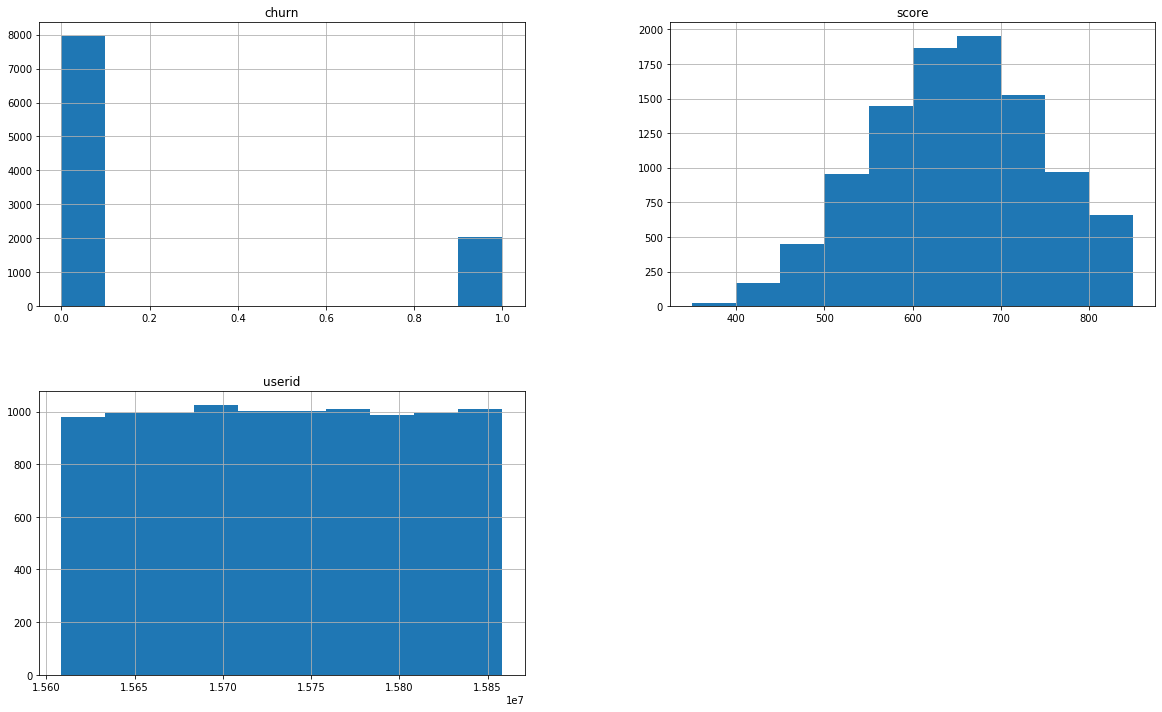

In [25]:
features = list(set(df.columns) - set(['city','gender','age', 'objects', 'balance', 
                                     'products', 'creditcard', 'loyalty', 'estimated_salary']))

df[features].hist(figsize=(20,12));

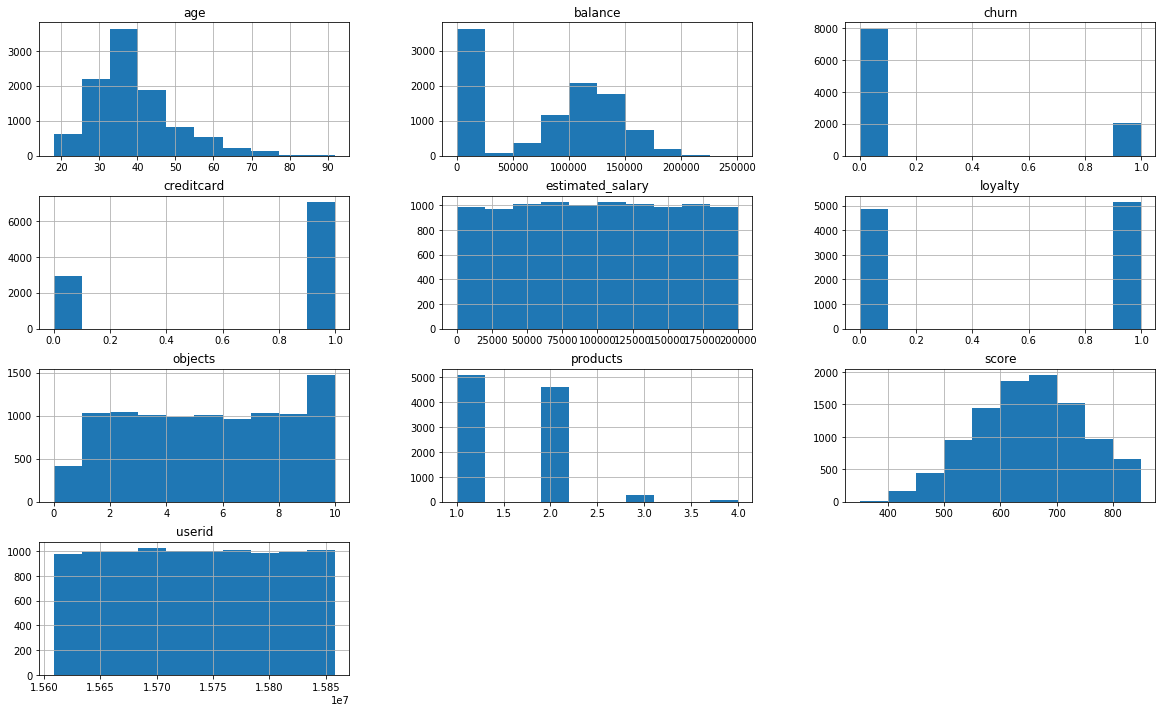

In [26]:
features = list(set(df.columns) - set(['city']))

df[features].hist(figsize=(20,12));

/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


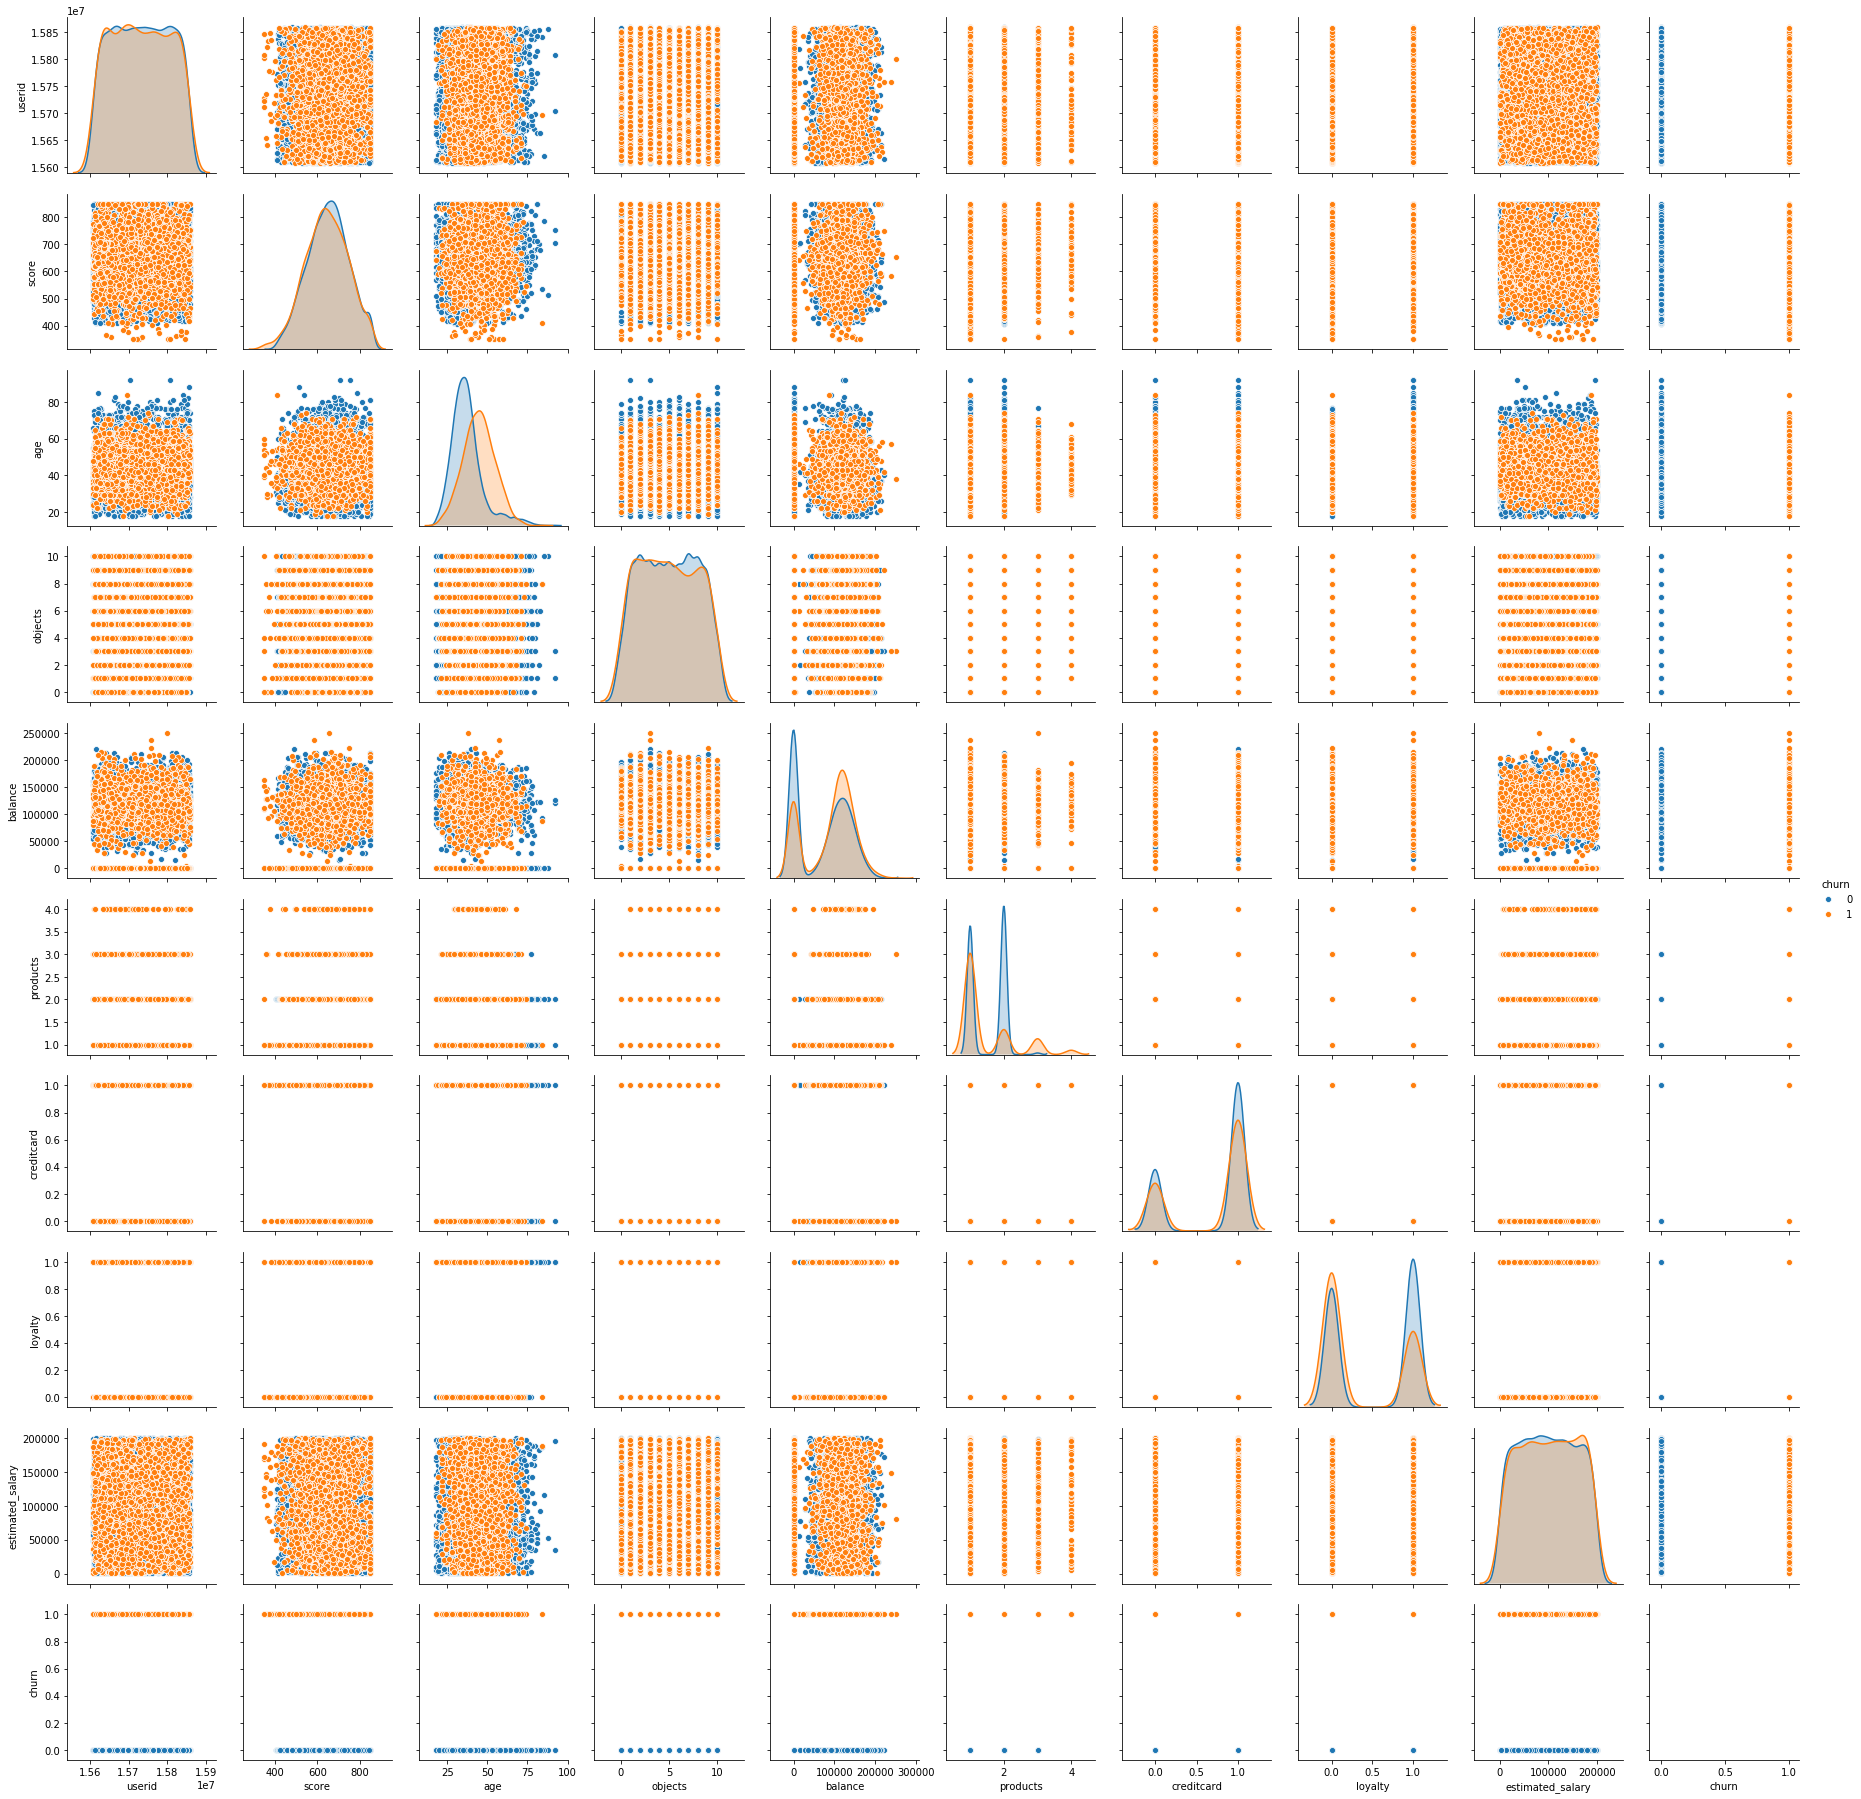

In [27]:
sns.pairplot(df,hue='churn')

In [28]:
#for column in df.columns:
#    plt.figure(figsize=(5, 5))
#    df.groupby('churn')[column]
#    sns.distplot(df[column])
#    plt.title(column)
#    plt.show()

Женщины в отличии от мужчин уходят чаще, возраст в 0 группе от 32 до 42 лет, в 1 группе от 40 до 50 лет,
количество объектов 0 группе меньше, чем в 1 группе.Баланс в 0 больше. Продуктами пользуются одинакова что в 1 что 0 группе.
кредитная карта и активные клиенты в беих группах одинаковые. Зарпла в 0 группе ниже, но не на много 1 группы.
Посмотреть ро городам то в Растове Великом ушли пользователь в большем количестве чем Ярославле и Рыбинске.


распределения

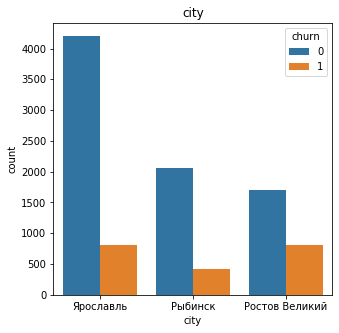

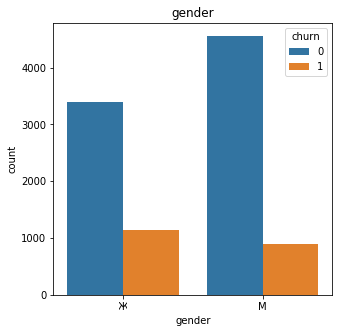

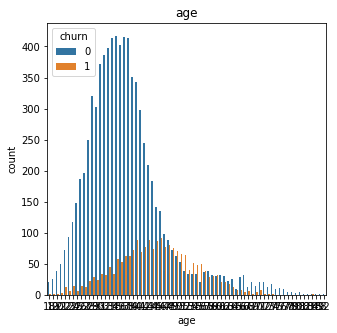

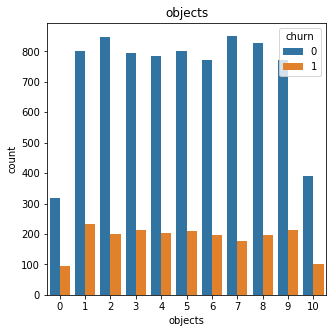

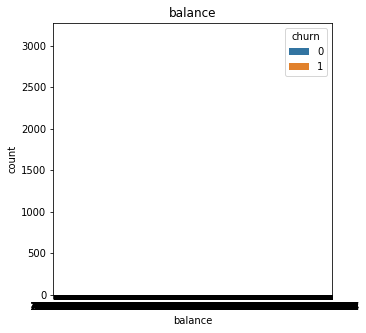

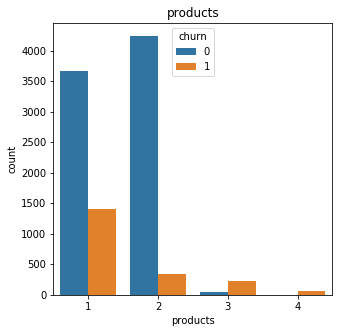

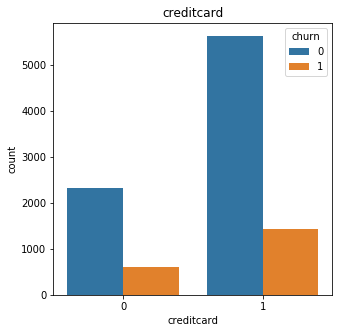

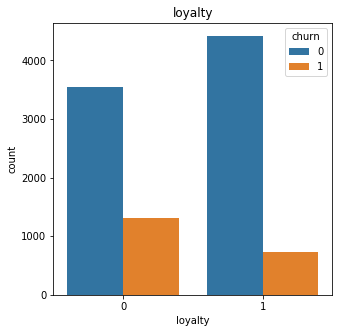

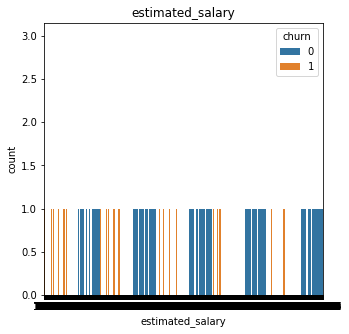

In [29]:
for column in ['city', 'gender','age', 'objects', 'balance', 'products', 'creditcard', 'loyalty', 'estimated_salary']:
    plt.figure(figsize=(5, 5))
    sns.countplot(x = df[column], hue='churn', data=df)
    plt.title(column)
    plt.show()

Женщины и мужчины в 0 группе активнее, возраст, собственность  0 группы выше, баланс одинаков.
А вот рользователи продуктом  1 и 2  пользуются чаще и постоянно, а пользователи с продуктом  3 и 4 не очень, и они уходят.
Кредиткой 1 группа пользуется больше и являются постоянными клиентами.

матрица корреляции

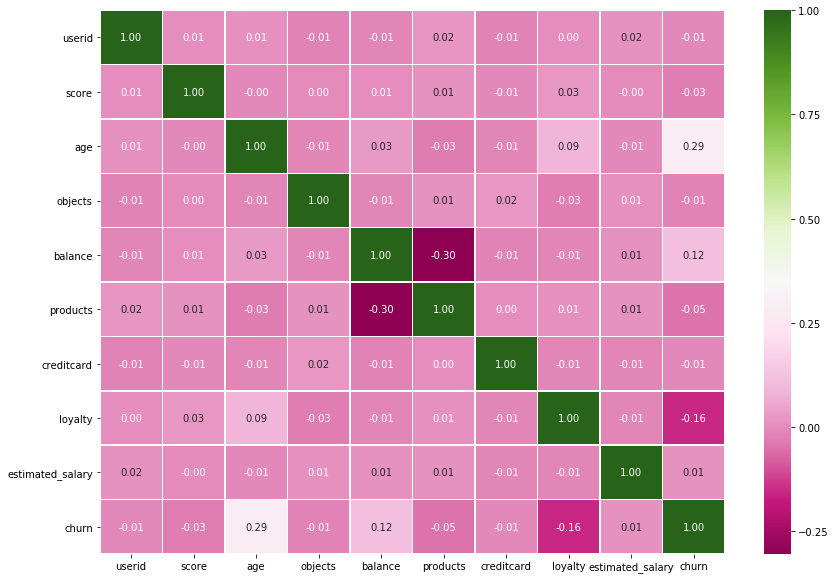

In [30]:
cm = df.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(cm, annot = True, fmt = '0.2f', linewidths=.5, cmap="PiYG")
plt.show()

# 5 Проверка гипотиз 

Критерий t Стьюдента направлен на оценку различий величин средних Х¯¯¯ и У¯¯¯ двух выборок X и Y, которые распределены по нормальному закону.

Для применения t-критерия Стьюдента необходимо, чтобы исходные данные имели нормальное распределение. Также имеет значение равенство дисперсий (распределения) сравниваемых групп. При неравных дисперсиях применяется t-критерий в модификации Уэлча.

Проверим данные на нормальность

In [31]:
df_churn_0=df.query("churn==0")
df_churn_1=df.query("churn==1")

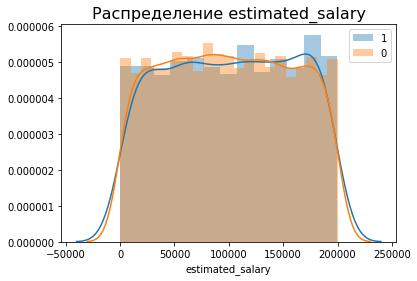

In [32]:
sns.distplot(df_churn_1['estimated_salary'],label='1')
sns.distplot(df_churn_0['estimated_salary'],label='0')
plt.title('Распределение estimated_salary',fontsize=16)
plt.legend()
plt.show()

распределены нормально, поэтому проведем t-test.

Проверим гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались.
Нулевая гипотеза- средняя выручка между оставшимися и ушедними пользователями равна
Альтернативная гипотеза - средняя выручка между оставшимися и ушедними пользователями отличается

In [33]:
alpha=0.05

print('Дисперсия ушедних:',df_churn_1['estimated_salary'].var())
print('Дисперсия оставшихся:',df_churn_0['estimated_salary'].var())

Дисперсия ушедних: 3353848819.5174017
Дисперсия оставшихся: 3295400995.0256743


Дисперсии равны

In [34]:
results = st.ttest_ind(
    df_churn_0['estimated_salary'], 
    df_churn_1['estimated_salary'])

In [35]:
p_value = results.pvalue

In [36]:
print('p-значение:', results.pvalue)

p-значение: 0.22644173695461328


In [37]:
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Не получилось отвергнуть нулевую гипотезу


Мы выяснили, что дисперсии ушедших и оставшихся равны и средняя выручка между оставшимися и ушедними пользователями равна

Проведем аналогичный анализ для score. Сначала проведем проверку на нормальность

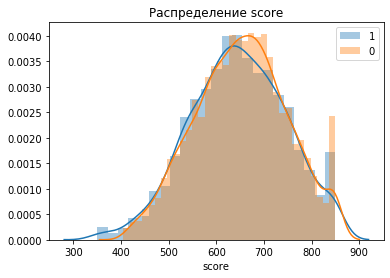

In [38]:
sns.distplot(df_churn_1['score'],label='1')
sns.distplot(df_churn_0['score'],label='0')
plt.title('Распределение score')
plt.legend()
plt.show()

Данные можно считать распределенными нормально.

In [39]:
alpha=0.05

print('Дисперсия ушедних:',df_churn_1['score'].var())
print('Дисперсия оставшихся:',df_churn_0['score'].var())

Дисперсия ушедних: 10064.403893876835
Дисперсия оставшихся: 9149.656541843884


Проверим гипотезу различия score между теми клиентами, которые ушли и теми, которые остались.
Нулевая гипотеза- средний счет между оставшимися и ушедними пользователями равен. Альтернативная гипотеза - средний счет между оставшимися и ушедними пользователями отличается.

In [40]:
results = st.ttest_ind(
    df_churn_0['score'], 
    df_churn_1['score'], equal_var=False)

In [41]:
p_value = results.pvalue

In [42]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.008464728991832877
Отвергаем нулевую гипотезу


Мы отвергли гипотезу о равестве средних score ушедших и оставшихся. Получается, уходящие пользователи становятся менее заинтересованными и их активнсть немного падает.

# 5. Сегментация пользователей по потреблению.

Построим модель прогнозирования оттока клиентов

In [43]:
data_for_ml=df[df.columns[1::]]
data_for_ml=pd.get_dummies(data_for_ml[df.columns[1::]])

In [44]:
data_for_ml

,score,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,city_Ростов Великий,city_Рыбинск,city_Ярославль,gender_Ж,gender_М
0,619,42,2,-1.00,1,1,1,101348,1,0,0,1,1,0
1,608,41,1,83807.86,1,0,1,112542,0,0,1,0,1,0
2,502,42,8,159660.80,3,1,0,113931,1,0,0,1,1,0
3,699,39,1,-1.00,2,0,0,93826,0,0,0,1,1,0
4,850,43,2,125510.82,1,1,1,79084,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,-1.00,2,1,0,96270,0,0,0,1,0,1
9996,516,35,10,57369.61,1,1,1,101699,0,0,0,1,0,1
9997,709,36,7,-1.00,1,0,1,42085,1,0,0,1,1,0
9998,772,42,3,75075.31,2,1,0,92888,1,1,0,0,0,1


In [45]:
X=data_for_ml[data_for_ml.columns[1::]].drop(columns='churn')
y=data_for_ml['churn']

Разделим выборки на тренировочную и валидационную

In [46]:
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
scaler=StandardScaler()
scaler.fit(X_train)
X_train_sc=scaler.transform(X_train)
X_test_sc=scaler.transform(X_test)

In [47]:
def train_model(m):
    'Функция тренирует модель m на тестовых данных и рассчитывает все необходимые метрики'
    print(m)
    model=m
    model.fit(X_train_sc,y_train)
    y_pred=model.predict(X_test_sc)
    print('Accuracy',accuracy_score(y_test,y_pred), 
         '\nRecall',recall_score(y_test,y_pred),
         '\nPrecision',precision_score(y_test,y_pred),'\n')

In [48]:
for mod in [LogisticRegression(), RandomForestClassifier()]:
    train_model(mod)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy 0.8125 
Recall 0.23209876543209876 
Precision 0.5949367088607594 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy 0.8585 
Recall 0.4962962962962963 
Precision 0.7178571428571429 



Вывод
Accuracy высокая у обоих моделей, но это обусловлено тем, что данные распределены неравномерно(ушедших всего 20%).
В данном проекте наиболее важной метрикой является recall (мы предсказали, что пользователь не уйдет, а он ушел). 
Эта метрика хоть и больше у случайного леса в два раза, однако недостаточно велика. Из этого можно сделать вывод, 
что на этих данных мы можем обучить только слаботочные модели, для повышения точности нужно больше данных

# Вывод проекта

доход клиентов не влияет на факт оттока - статистический тест подтвердил гипотезу о том, что средний доход клиентов, ушедших в отток, не имеет статистически значимых различий со средним доходом клиентов, которые остались с банком;
портрет клиента, склонного к оттоку в целом таков:
средний возраст 45 лет;
проживает в основном в Ярославле и Ростове Великом (доли практически равные);
70% этих клиентов имеют кредитную карту;
низкая активность;
в среднем 5 объектов в собственности;
в среднем оформлено 1,5 продукта;
гендерный состав неравномерный - 45% мужчины, 55% женщины;
кредитный рейтинг в среднем такой же, как у тех, кто остался.

# Рекомендации
Следует провести анализ качества предоставляемых услуг в городе Ростов Великий, предоставить дополнительные услуги/льготы для пользователей с 3 и более продуктами. Провести акции по удержанию пользователей старших лет и женщин, 
постараться увеличить используемость продукции в месяц